# EDSA Apples Price Challenge 
Advanced Regression Predict



Submitted by Regression_Team_ZM2_DSFT:
- Happiness Chwayita Sidzumo
- Richard Malahlela
- Shanice Pillay
- Tawanda Madamombe


# Machine Learning Outline

1. [Introduction](#in) 

2. [Data cleaning and formatting](#CL)

2. [Exploratory data analysis](#EDA)

3. [Data Preprocessing](#pre)

4. [Model Selection and Deployment](#ms)

5. [Conclusion](#c)


<a id="in"></a>
# 1. Introduction
In this notebook, we will walk through solving a complete machine learning problem to predict the average price per kilogram of Golden Delicious Apples.

This is a supervised, regression machine learning task: given a set of data with a target (in this case the average price per kilogram of Golden Delicious Apples) included, we want to train a model that can learn to map the features (also known as the explanatory variables) to the target.

* Supervised problem: we are given both the features and the target variables
* Regression problem: the target is a continous variable, in this case ranging from 0 - 21

During training, we want the model to learn the relationship between the features and the target so we give it both the features and the answer. Then, to test how well the model has learned, we evaluate it on a testing set where it has never seen the answers.

## Challenge Description
The dataset is based on the Fresh Produce Industry and we need to determine how much stock do we need to have on hand in order to meet consumer demand while still preventing any wastage. We need to analyse the seasonal trends to see if there is a connection with how we set your prices.

Therefore we need to construct a regression algorithm to predict how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

## Problem Definition 
Build a machine learning regression model that can accurately predict the average price per kilogram of Apple Golden Delicious produce. 

## Data Overview

This dataset consists of over 60 000 sales made by Durban Fresh Produce Market.

We will use this data to predict the average price per kilogram of Golden Delicious Apples.

Source - The data for this dataset was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs.

Target Variable:
- Avg_price_per_kg - Average price per kg of Apple Golden Delicious

Predictor Variables:
- Province - Which province the produce was grown
- Container - The code for the type of container
- Size_Grade - The class of the produce according to their quality
- Weight_Kg - The total weight in kilograms
- Commodities - The type of produce, e.g. Golden Delicious Apples
- Date - The date of the sale
- Sales_Total - The total sales price
- Total_Qty_Sold - The number of produce sold
- Total_Kg_Sold - The total weight of the produce sold in kilograms
- Stock_On_Hand - The amount of produce the store has



## Imports
 
We will use the standard data science and machine learning libraries: `numpy`, `pandas`, and `scikit-learn`. We also use `matplotlib` and `seaborn` for visualization. 

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Importing libraries for Regression and xgboost models
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Model slection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#shap
import shap

#r2score
from sklearn.metrics import r2_score

<a id="CL"></a>
# 2. Data Cleaning and Formatting

## Load in the Data and Examine

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. To easily manipulate, clean, and visualize our data. Pandas dataframe help make the data science/machine learning process easy to understand and follow along with.

In [37]:
# loading the data
df_train = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/utils/data/train_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/utils/data/test_data.csv')


In [76]:
# Display top of the training dataframe
df_train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51


In [77]:
# Display top of the testing dataframe
df_test.head(2)

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


In [6]:
# Checking the number of columns and rows in the testing dataframe
df_test.shape

(685, 13)

In [7]:
# Checking the number of columns and rows in the training dataframe
df_train.shape

(64376, 13)

Looking at the two datasets, we can already make a few observations. 

The shape attribute of pandas.DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns). First of all, there are 13 columns in both datasets. There are 685 rows in the test set and 64376 in the training set. 

The data variables have been listed ,however, in machine learning, we let the model decide which features are important.

## Data Types, Missing Values and Removing Columns

The `dataframe.info` method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. 

In [8]:
# Viewing the column data types and checking for non-missing values - test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


In [9]:
# Viewing the column data types and checking for non-missing values - training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


Looking at the datasets, we can see that there are three data types:
* object
* float64
* int64

The info command confirms our categorical and numerical features. If a feature (variable) is categorical the Dtype is object and if it is a numerical variable the Dtype is an int64 or float64.

In [38]:
# drop index for the test data, train data doesnt have index column
df_test = df_test.drop('Index', axis=1) 

#display data in test dataset
df_test.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


In [39]:
#removing other commodities from the training dataset
df_train_removal = df_train[df_train['Commodities'] == 'APPLE GOLDEN DELICIOUS']
df_train = df_train_removal.copy()

#display data in train dataset
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [40]:
#drop the commodities column 
df_train.drop(['Commodities'], axis=1)

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78


In [41]:
#removing other commodities from the test dataset
df_test_removal = df_test[df_test['Commodities'] == 'APPLE GOLDEN DELICIOUS']
df_test = df_train_removal.copy()

#display data in test dataset
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [42]:
#drop the commodities column 
df_test.drop(['Commodities'], axis=1)

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00
64291,ORANGE FREE STATE,M4183,1X,18.3,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10
64297,CAPE,JE090,2M,9.0,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67
64304,CAPE,JG110,2M,11.0,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78


We have dropped the column Commodities because it has become redundant; all the data now refers to 'APPLE GOLDEN DELICIOUS' exclusively. 

In [43]:
# changing date datatype to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

#display data in train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 213.5+ KB

In [44]:
# changing date datatype to datetime
df_test['Date'] = pd.to_datetime(df_test['Date'])

#display data in test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 213.5+ KB

We have changed the date datatype in both datasets to ensure uniformity across all data and to help us make better informed decisions when building our models at a later stage. The new datatypes will assist in easing the process of building the baseline for the models as well as analysing the data for our conclusion. 

## Seasonal Trends

Create a new column called month so that we can form seasons. 

In [45]:
#convert date to day, month and year
#train['year']= train['Date'].dt.year
df_train['month']= df_train['Date'].dt.month
df_test['month']= df_test['Date'].dt.month

df_train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,9
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,4


In [46]:
# drop date columns
df_train.drop('Date', axis=1, inplace=True) #df.drop(['B', 'C'], axis=1)
df_test.drop('Date', axis=1, inplace=True)

In [47]:
#creating seasons
seasons = ['Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer']

In [48]:
#changing months to seasons
month_to_season = dict(zip(range(1,13), seasons))

month_to_season

{1: 'Summer',
 2: 'Summer',
 3: 'Autumn',
 4: 'Autumn',
 5: 'Autumn',
 6: 'Winter',
 7: 'Winter',
 8: 'Winter',
 9: 'Spring',
 10: 'Spring',
 11: 'Spring',
 12: 'Summer'}

In [49]:
#creating seasons dataframe
df_train.month = df_train.month.map(month_to_season)
df_test.month = df_test.month.map(month_to_season)
#renaming months with seasons
df_train.rename(columns={'month': 'Season'}, inplace=True)
df_test.rename(columns={'month': 'Season'}, inplace=True)

In [50]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,Spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,Autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,Autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,Spring


In [51]:
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,Spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,Autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,Autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,Spring


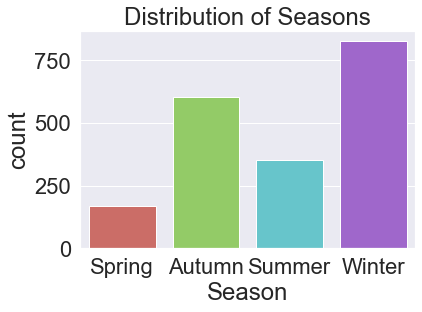

In [52]:
#bar plot of size grade - training data
sns.countplot(x = 'Season', data = df_train, palette="hls")
plt.title("Distribution of Seasons");

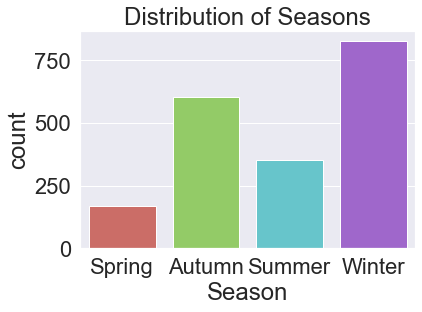

In [53]:
#bar plot of size grade - test data
sns.countplot(x = 'Season', data = df_test, palette="hls")
plt.title("Distribution of Seasons");

## Missing Values

Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders. Training a model with a dataset that has a lot of missing values can significantly influence the machine learning model’s quality. Some algorithms such as scikit-learn estimators assume that all values are numerical and have and hold meaningful value.

One solution would be to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values. In other words, we need to infer those missing values from the existing part of the data. There are three main types of missing data:
- Missing completely at random (MCAR)
- Missing at random (MAR)
- Not missing at random (NMAR)

Let us start by first checking if there are missing values present in the dataset. We do this by looking at the percentage of missing values in each column. There can be missing values when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Below is a function that calculates the number of missing values and the percentage of the total values that are missing for each column.

In [18]:
#checking if there are missing values - training dataset
df_train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [19]:
#checking if there are missing values - testing dataset
df_test.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

Following the above, we can clearly confer that are no missing values in both datasets. 
The next step is the Exploratory Data Analysis.

<a id="EDA"></a>
# 3. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. Seeing connections between variables through correlations can be used to make better informed modeling decisions such as which features to use to produce a better performing maching learning model. The purpose of EDA is to determine what our data can tell us. EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine. This phase includes descriptive statistics and data visualisations.

Exploratory data analysis is cross-classified in two ways. 
1. Each method is either *non-graphical or graphical*. 
2. Each method is either *univariate or multivariate* (usually just bivariate).


## Univariate Non-graphical EDA

 The first univariate analysis will be non-graphical. This is where we will be looking at the *descriptive statistics* of each feature. The  goal of univariate non-graphical EDA is to better appreciate the “sample distribution”
and also to make some tentative conclusions about what population distribution(s)
is/are compatible with the sample distribution. Outlier detection is also a part of
this analysis.

In [14]:
# Statistics for each column
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [15]:
# Statistics for each column
df_test.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


## Kurtosis and Skew

Both kurtosis and skew are important statistical terms to be familiar with in data science. 

*Kurtosis* is the measure of outliers present in the data. 
- High kurtosis (>3) indicates a large number of outliers 
- Low kurtosis (<3) a lack of outliers. 

*Skew* will indicate how symmetrical your data is.
if the Skew:
- -0.5 < x < 0.5	- Fairly symmetrical
- -1 < x < -0.5	    - Moderate Negative Skew
- 0.5 < x < 1	    - Moderate Positive Skew
- x < -1	        - High Negative Skew
- x > 1             - High Positve Skew

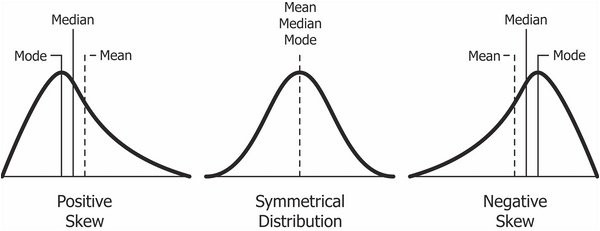


In [21]:
#Skewness of training set
df_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

In [20]:
#Skewness of testing set
df_test.skew()

Weight_Kg         3.941111
Low_Price         4.585123
High_Price        4.326922
Sales_Total       3.839600
Total_Qty_Sold    3.710551
Total_Kg_Sold     4.270965
Stock_On_Hand     3.197405
dtype: float64

The target variable has a skewness less than 0.5 which means that it is fairly symmetrical. 
All the predictor variables have a skewness are greater than 1, therefore we can clearly assume that the dataset has a high positive skew. 

In [23]:
df_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

There is high kurtosis in the training dataset as all the predictor variables are greater than 3 indicating a large number of outliers.
The target variable has a low kurtosis (less than 3) indicating a low number of outliers. 

## Univariate Analysis: Graphical 

We can look at the distribution of any numerical feature by using the following plots:

- histogram
- box plot

For a categorical feature we will use a:

- bar plot


## Histogram¶

A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis.

For displaying a histogram we will be using the Matplotlib library and create a list of all numerical features to visualise these features at the same time.

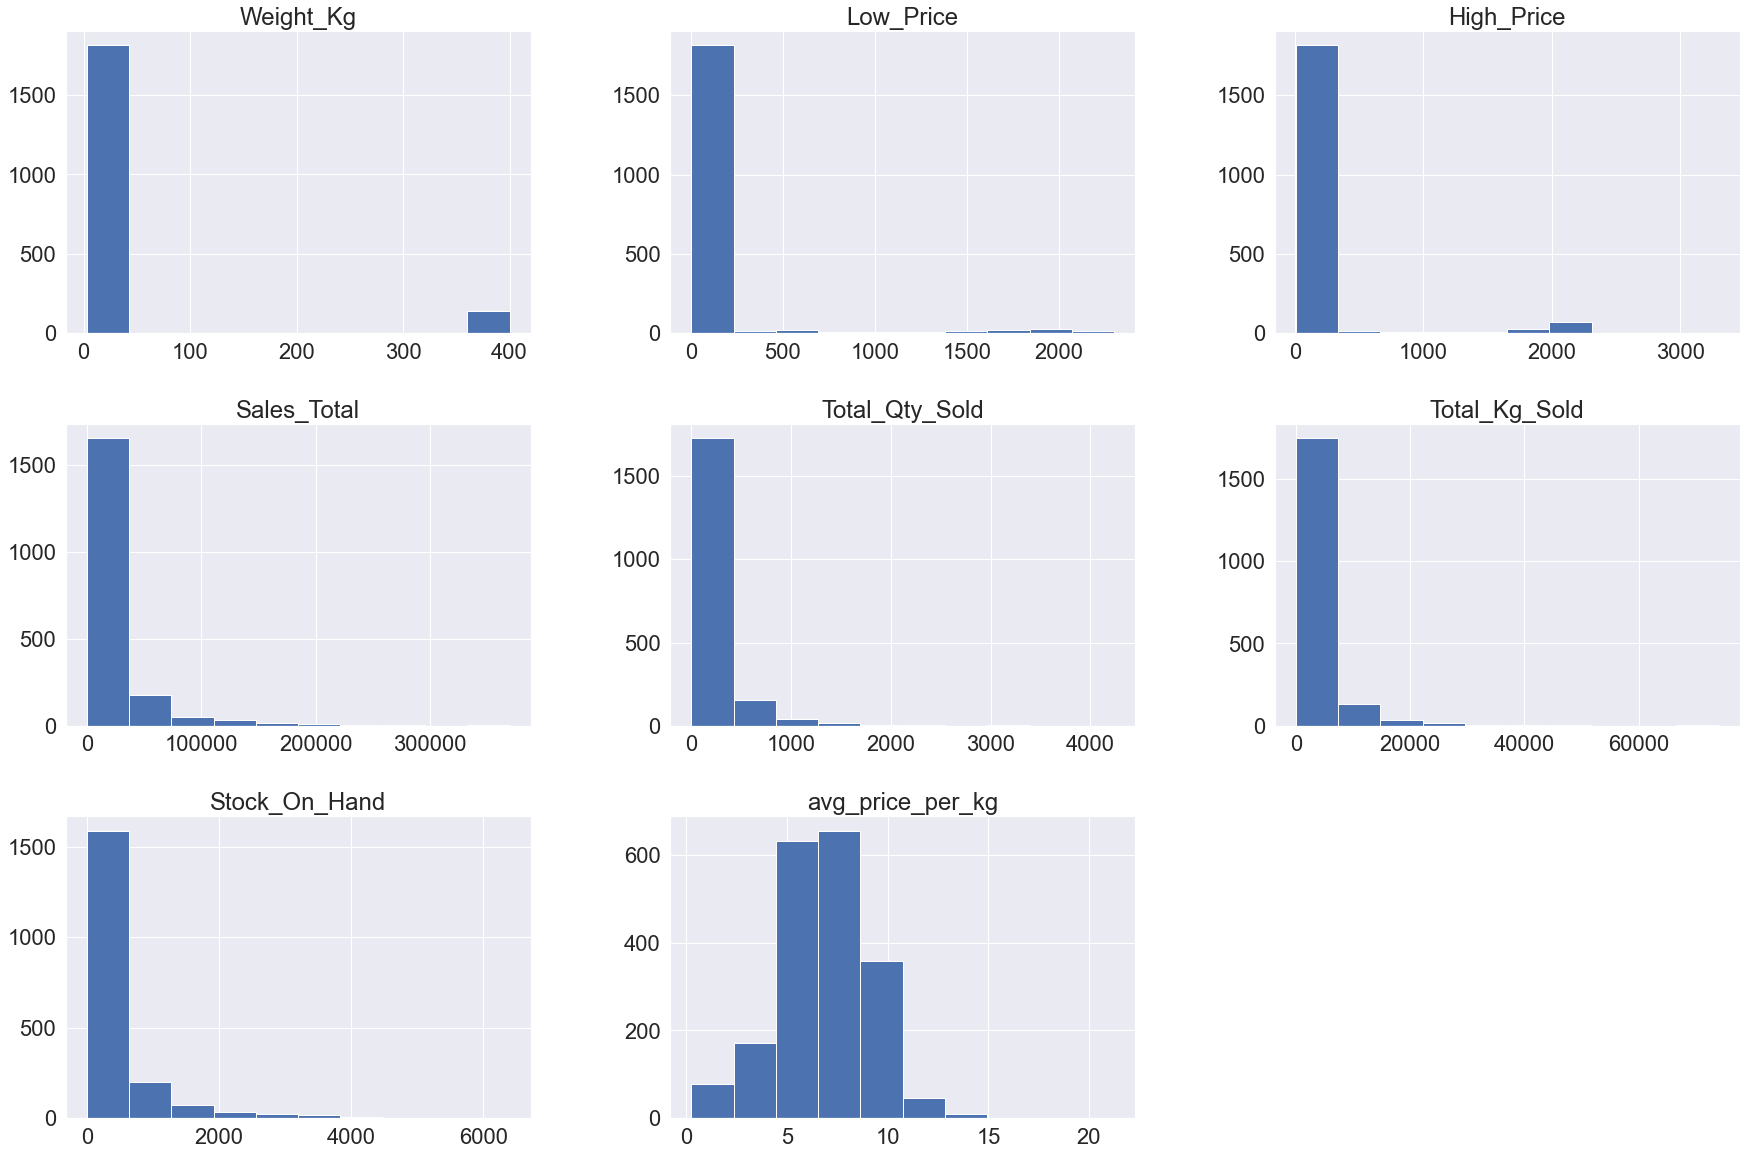

In [41]:
# histogram showing all numerical features

features = ['Weight_Kg',          
'Low_Price',           
'High_Price',          
'Sales_Total',         
'Total_Qty_Sold',      
'Total_Kg_Sold',       
'Stock_On_Hand',       
'avg_price_per_kg' ]
df_train[features].hist(figsize=(30,20));


## Box Plot

A box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Outliers may be plotted as individual points. For the Box Plot, we will use the seaborn library and only select one feature instead of all the numerical features. We can visualise all numerical features simultaneously, but as the range of values for each feature is different, it will not create a useful visualisation. Standardisation or normalisation can be applied to a feature to adjust the range.

We chose box plot to show the distribution of the data around each variable.

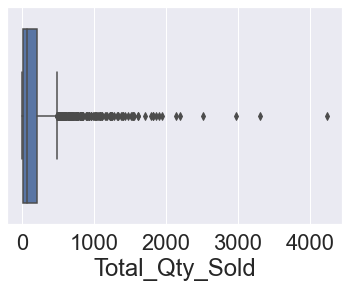

In [79]:
# boxplot showing total quantity sold
sns.boxplot(x='Total_Qty_Sold', data=df_train,);

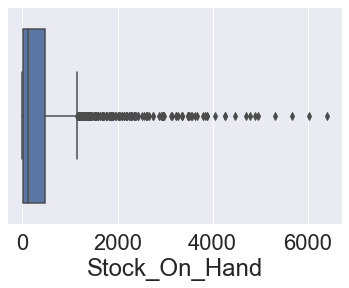

In [81]:
# boxplot showing stock on hand
sns.boxplot(x='Stock_On_Hand', data=df_train,);

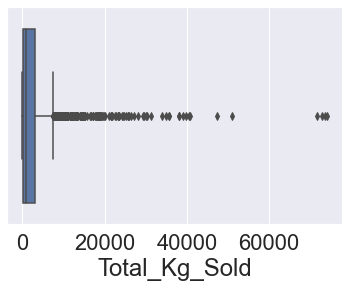

In [80]:
# boxplot showing total kg sold
sns.boxplot(x='Total_Kg_Sold', data=df_train,);

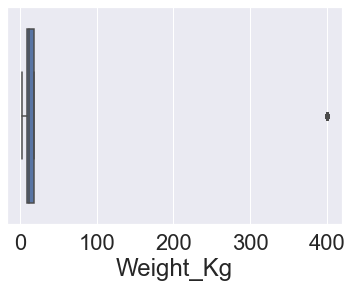

In [82]:
# boxplot showing weight
sns.boxplot(x='Weight_Kg', data=df_train,);

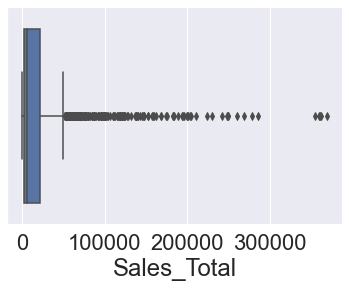

In [84]:
# boxplot showing sales total
sns.boxplot(x='Sales_Total', data=df_train,);

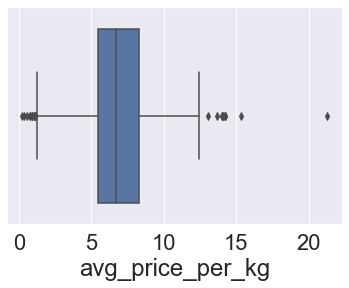

In [86]:
# boxplot showing avg price per kg
sns.boxplot(x='avg_price_per_kg', data=df_train,);

The five vertical lines in the boxplot provide the information of the five number summary and the dots on the right hand side of the graph is a display of outliers. A five-number summary is especially useful in descriptive analyses or during the preliminary investigation of a large data set. 
A summary consists of five values: 
- the most extreme values in the data set (the maximum and minimum values) 
- the lower and upper quartiles 
- and the median. 
These values are presented together and ordered from lowest to highest: minimum value, lower quartile (Q1), median value (Q2), upper quartile (Q3), maximum value.

After examining the box plots, it is clear that the average price per kilogram of apples is fairly even distributed/symmetrical with a few outliers that are not included in the box of other observation i.e no where near the quartiles. The rest of the predictor variables are skewed to the left/distributed on the left hand side with outliers as well.

## Bar Plot

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

We will create a **bar plot** using the size_grade feature to display the frequency distribution. 

We'll generate a bar plot of the categorical feature, where each bar represents a unique number from the data, and the height represents how many times that number occurred. This can be done by using seaborn's `countplot`. 

We chose the bar plot to examine any patterns in the dataset. 

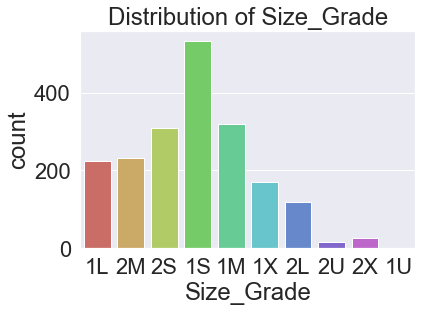

In [20]:
#bar plot of size grade
sns.countplot(x = 'Size_Grade', data = df_train, palette="hls")
plt.title("Distribution of Size_Grade");

1S is the largest/highest bar indicating that this size grade was the most popular size grade of apples.

<a id="pre"></a>
# 4. Data Preprocessing

## Dummy Variable Encoding

A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study. Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don’t need to write out separate equation models for each subgroup. The dummy variables act like ‘switches’ that turn various parameters on and off in an equation. Below is a function that takes a dataframe and returns dummy variables of its specified categorical features in our dataset.

In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   category      
 1   Container         1952 non-null   category      
 2   Size_Grade        1952 non-null   category      
 3   Weight_Kg         1952 non-null   float64       
 4   Date              1952 non-null   datetime64[ns]
 5   Low_Price         1952 non-null   float64       
 6   High_Price        1952 non-null   float64       
 7   Sales_Total       1952 non-null   float64       
 8   Total_Qty_Sold    1952 non-null   int64         
 9   Total_Kg_Sold     1952 non-null   float64       
 10  Stock_On_Hand     1952 non-null   int64         
 11  avg_price_per_kg  1952 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(6), int64(2)
memory usage: 159.3 KB


In [163]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   category      
 1   Container         1952 non-null   category      
 2   Size_Grade        1952 non-null   category      
 3   Weight_Kg         1952 non-null   float64       
 4   Date              1952 non-null   datetime64[ns]
 5   Low_Price         1952 non-null   float64       
 6   High_Price        1952 non-null   float64       
 7   Sales_Total       1952 non-null   float64       
 8   Total_Qty_Sold    1952 non-null   int64         
 9   Total_Kg_Sold     1952 non-null   float64       
 10  Stock_On_Hand     1952 non-null   int64         
 11  avg_price_per_kg  1952 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(6), int64(2)
memory usage: 159.3 KB


In [40]:
# dummy variable encoding
def dummy_encode_titles(input_df):
    temp_df = input_df.copy()
    
    # Apply Dummy Encoding 
    temp_df = pd.get_dummies(temp_df, columns=['Province','Container','Size_Grade'], drop_first=True)
    
    return temp_df

In [41]:
train_withDummy=dummy_encode_titles(df_train) #for train data
test_withDummy=dummy_encode_titles(df_test) #for test data

In [42]:
train_withDummy.drop('Commodities', axis=1, inplace=True)
test_withDummy.drop('Commodities', axis=1, inplace=True) 

In [43]:
train_withDummy.head(2)

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
test_withDummy.head(2)

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


## Multivariate Analysis: non-graphical and graphical

During this analysis, we can determine the relationship between any two numerical features by calculating the **correlation coefficient**. Correlation is a measure of the degree to which two variables change together, if at all. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases. 

There are three different correlation measures:

- Pearson correlation
- Spearman rank correlation
- Kendall correlation

In this notebook, we will focus on the Pearson correlation. The Pearson correlation measures the linear relationship between features and assumes that the features are normally distributed. Below is a table that explains how to interpret the Pearson correlation measure:

Pearson Correlation Coefficient (r)	Description of Relationship:

- -1	Perfect Negative Correlation
- -1 < r < -0.8	Strong Negative Correlation 
- -0.8 < r < -0.5	Moderate Negative Correlation
- -0.5 < r < 0	Weak Negative Correlation
- 0	No Linear Correlation
- 0 < r < 0.5	Weak Positive Correlation
- 0.5 < r < 0.8	Moderate Positive Correlation
- 0.8 < r < 1	Strong Positive Correlation
-  1	Perfect Positive Correlation

## Correlations 

Using the dummy variable dataframe, we can examine the correlation between the predictor variables vs avg_price_per_kg (our dependent variable).

In [30]:
train_withDummy.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,-0.082671,0.182454,0.011943,-0.025492,-0.084757,-0.074890,-0.019039,-0.155910,-0.056706,-0.010420,0.999231,-0.201543,-0.063095,-0.146043,-0.020139,-0.011011,-0.046532,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,-0.085458,0.000035,0.023433,-0.025898,-0.019829,-0.064464,-0.021828,-0.136387,-0.042398,-0.006336,0.860219,-0.216723,-0.067325,-0.073773,-0.016776,-0.009207,-0.023629,0.288148,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,-0.097573,0.033792,0.014501,-0.026755,-0.053877,-0.077612,-0.024103,-0.131819,-0.051627,-0.009201,0.902518,-0.234796,-0.074943,-0.074061,-0.020885,-0.011222,-0.039365,0.331683,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.153576,-0.088184,-0.000229,0.036189,-0.108360,-0.087502,-0.028371,0.072059,-0.072041,0.005516,0.172753,-0.225452,-0.025977,0.125820,-0.031959,-0.012063,-0.057071,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.144064,-0.091620,-0.003297,0.089299,-0.107589,-0.051844,-0.029978,0.177089,-0.069864,0.006289,-0.135627,-0.107026,0.050806,0.035805,-0.031962,-0.010528,-0.061837,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,-0.139492,-0.060972,-0.005604,0.041585,-0.123775,-0.076015,-0.026515,0.030087,-0.070662,0.001132,0.288659,-0.194275,-0.008118,0.058321,-0.029402,-0.011677,-0.076261,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,-0.140210,-0.135137,-0.036748,-0.046745,-0.068248,-0.099175,-0.029355,0.138249,-0.074805,-0.022123,-0.147545,-0.066647,-0.071657,0.093458,-0.032883,-0.022123,-0.028461,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.178531,-0.379801,-0.025026,-0.020415,0.262051,-0.025122,-0.059579,0.188162,0.114297,0.023753,-0.355565,-0.322235,-0.140148,0.403229,0.007568,0.002812,0.175779,-0.028506,-0.027335,0.251451,-0.089733,-0.153372,-0.352996,-0.069457,-0.051624
Province_EASTERN CAPE,-0.082671,-0.085458,-0.097573,-0.153576,-0.144064,-0.139492,-0.140210,-0.178531,1.000000,-0.084342,-0.023377,-0.030227,-0.185294,-0.090229,0.041170,0.177327,-0.068184,-0.013476,-0.075658,0.133737,-0.073291,-0.192815,0.068776,-0.013476,0.060135,-0.011771,-0.011000,-0.094638,0.057867,0.157235,-0.048046,-0.032196,-0.039909
Province_NATAL,0.182454,0.000035,0.033792,-0.088184,-0.091620,-0.060972,-0.135137,-0.379801,-0.084342,1.000000,-0.016712,-0.021608,-0.132460,-0.064501,0.146212,-0.028803,0.032340,-0.009634,0.190062,-0.005505,-0.041553,-0.156397,-0.017620,-0.009634,-0.042716,0.048429,-0.007864,-0.076085,-0.062844,-0.056002,0.221405,-0.023015,-0.028529


In [31]:
test_withDummy.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,-0.082671,0.182454,0.011943,-0.025492,-0.084757,-0.074890,-0.019039,-0.155910,-0.056706,-0.010420,0.999231,-0.201543,-0.063095,-0.146043,-0.020139,-0.011011,-0.046532,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,-0.085458,0.000035,0.023433,-0.025898,-0.019829,-0.064464,-0.021828,-0.136387,-0.042398,-0.006336,0.860219,-0.216723,-0.067325,-0.073773,-0.016776,-0.009207,-0.023629,0.288148,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,-0.097573,0.033792,0.014501,-0.026755,-0.053877,-0.077612,-0.024103,-0.131819,-0.051627,-0.009201,0.902518,-0.234796,-0.074943,-0.074061,-0.020885,-0.011222,-0.039365,0.331683,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.153576,-0.088184,-0.000229,0.036189,-0.108360,-0.087502,-0.028371,0.072059,-0.072041,0.005516,0.172753,-0.225452,-0.025977,0.125820,-0.031959,-0.012063,-0.057071,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.144064,-0.091620,-0.003297,0.089299,-0.107589,-0.051844,-0.029978,0.177089,-0.069864,0.006289,-0.135627,-0.107026,0.050806,0.035805,-0.031962,-0.010528,-0.061837,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,-0.139492,-0.060972,-0.005604,0.041585,-0.123775,-0.076015,-0.026515,0.030087,-0.070662,0.001132,0.288659,-0.194275,-0.008118,0.058321,-0.029402,-0.011677,-0.076261,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,-0.140210,-0.135137,-0.036748,-0.046745,-0.068248,-0.099175,-0.029355,0.138249,-0.074805,-0.022123,-0.147545,-0.066647,-0.071657,0.093458,-0.032883,-0.022123,-0.028461,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.178531,-0.379801,-0.025026,-0.020415,0.262051,-0.025122,-0.059579,0.188162,0.114297,0.023753,-0.355565,-0.322235,-0.140148,0.403229,0.007568,0.002812,0.175779,-0.028506,-0.027335,0.251451,-0.089733,-0.153372,-0.352996,-0.069457,-0.051624
Province_EASTERN CAPE,-0.082671,-0.085458,-0.097573,-0.153576,-0.144064,-0.139492,-0.140210,-0.178531,1.000000,-0.084342,-0.023377,-0.030227,-0.185294,-0.090229,0.041170,0.177327,-0.068184,-0.013476,-0.075658,0.133737,-0.073291,-0.192815,0.068776,-0.013476,0.060135,-0.011771,-0.011000,-0.094638,0.057867,0.157235,-0.048046,-0.032196,-0.039909
Province_NATAL,0.182454,0.000035,0.033792,-0.088184,-0.091620,-0.060972,-0.135137,-0.379801,-0.084342,1.000000,-0.016712,-0.021608,-0.132460,-0.064501,0.146212,-0.028803,0.032340,-0.009634,0.190062,-0.005505,-0.041553,-0.156397,-0.017620,-0.009634,-0.042716,0.048429,-0.007864,-0.076085,-0.062844,-0.056002,0.221405,-0.023015,-0.028529


We can make the following observations:
- avg price vs **weight** -0.337886 weak negative correlation
- avg price vs **low price** -0.337886 weak negative correlation
- avg price vs **high price** -0.164496 weak negative correlation
- avg price vs **sales** 0.108473  weak positive correlation
- avg price vs **total qty sold** 0.087536 weak positive correlation
- avg price vs **total kg sold** -0.001007 weak negative correlation
- avg price vs **stock on hand** 0.105028 weak positive correlation

However, because we split the province, container and size grade into subsets it is difficult to make an assumption of the overal correlation coefficient r with regards to these predictor variables as a whole. 

We can see from the correlations that it's not be the best idea to keep all of the dummy variables.

If we use all of these variables, we're effectively working with superfluous or redundant information. Our model will also have collinearity issues.

For this reason, we will look at the correlation heatmap without the dummy variable encoding. 

### Correlation heatmap

The relationship between features can also be displayed graphically using a heatmap. The Seaborn library will be used for this basic heatmap visualisation.

The correlation coefficient value will be displayed on the heatmap using the vmin and vmax parameters.

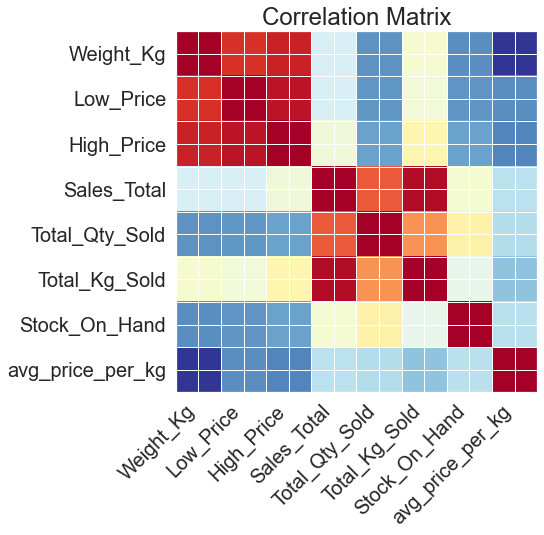

In [49]:
#train dataset
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax);

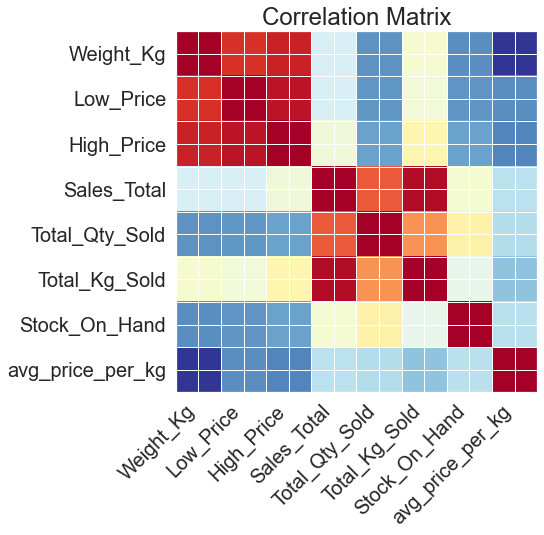

In [37]:
#test dataset
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(111);
plot_corr(df_test.corr(), xnames = df_test.corr().columns, ax = ax);

Now we will look at the OLS model summary

## Fitting the model using statsmodels.OLS¶

### Generating the regression string

We will be importing the statsmodels library which has a rich set of statistical tools to help us. Fitting a machine learning model requires a sort of string of the form:

y ~ X

which is read as follows: "Regress y on X". statsmodels works in a similar way, so we need to generate an appropriate string to feed to the method when we wish to fit the model.

In [52]:
from statsmodels.formula.api import ols
# Model DataFrame with all of the columns:
dfm = df_train.copy()
# The dependent variable:
y_name = 'avg_price_per_kg'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]
# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 avg_price_per_kg ~ Province + Container + Size_Grade + Weight_Kg + Commodities + Date + Low_Price + High_Price + Sales_Total + Total_Qty_Sold + Total_Kg_Sold + Stock_On_Hand


In [53]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     23.14
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        21:13:03   Log-Likelihood:                -3183.3
No. Observations:                1952   AIC:                             6723.
Df Residuals:                    1774   BIC:                             7715.
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [55]:
train_withDummy = pd.get_dummies(df_train, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces
train_withDummy.columns = [col.replace(" ", "_") for col in train_withDummy.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in train_withDummy.columns if col !=
                 'avg_price_per_kg'] + ['avg_price_per_kg']
train_withDummy = train_withDummy.reindex(columns=column_titles)

train_withDummy.head()

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN_CAPE,Province_NATAL,Province_ORANGE_FREE_STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER_ETC,Province_WEST_COAST,Container_DT063,Container_EC120,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
1,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8.51
7,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4.55
24,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6.11
40,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.51
69,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4.50


In [57]:
train_withDummy.shape

(1952, 34)

Let's make further selections on the variables now using their significance.

## Variable Selection by Correlation and Significance

We now have 40 predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between the Loan Size and each variables in our DataFrame and select those with the strongest correlations (both positive and negative).

We also need to consider how significant those features are.

The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference.

In [59]:
# Calculate correlations between predictor variables and the response variable
corrs = train_withDummy.corr()['avg_price_per_kg'].sort_values(ascending=False)

In [60]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'avg_price_per_kg']
for col in column_titles:
    p_val = round(pearsonr(train_withDummy[col], train_withDummy['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]


,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.000000
Size_Grade_2S,-0.352996,0.000000
Weight_Kg,-0.337886,0.000000
Container_JE090,-0.322235,0.000000
Province_EASTERN_CAPE,-0.178531,0.000000
High_Price,-0.164496,0.000000
Size_Grade_2M,-0.153372,0.000000
Low_Price,-0.141740,0.000000
Container_JG110,-0.140148,0.000000
Container_IA400,-0.355565,0.000000


Now, we've got a sorted list of the p-values and correlation coefficients for each of the features, when considered on their own.

If we were to use a logic test with a significance value of 5% (p-value < 0.05), we could infer that the following features are statistically significant:

Size_Grade,
Container,
Total_Qty_Sold,
Stock_On_Hand,
Sales

Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame X

<a id="ms"></a>
# 5. Model Selection and Deployment

We will now look at which machine learning models we should select in order to predict the price of apples. 

In this section we explore three types of models:
1. The Linear Regression model
2. Random Forest (RF) 
3. XGBoost Model

After cleaning and preprocessing data as outlined above we created two csv files (for both train and test data) that we pushed to Github and we will easilyrefer to them below. 

RF and XGBoost are both ensembling methods that perform regression by combining the outputs from individual trees. RF and XGBoost differ in the way individual trees are built and in the way the results are combined. RF build independent trees and combine them in parallel. Xgboost use a method called boosting. Boosting combines weak learners sequentially so that each new tree corrects the errors of the previous one. XGBoost have a lot of model capacity so the can model very complex relationships and decision boundaries.

In [2]:
#loading datasets
train_new = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/train_withDummy.csv')
test_new = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/test_withDummy.csv')

## 1. Linear regression model

In [4]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)

In [5]:
# Defining the features (X) and the response variable (y)
X = train_new.drop('avg_price_per_kg',axis=1).values
y = train_new['avg_price_per_kg'].values

In [6]:
#Splitting the data into 80% training and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
# creating model
model_lm = LinearRegression()
    
# train model
model_lm.fit(x_train, y_train)

LinearRegression()

In [8]:
# Make predictions and evalute
train_pred = model_lm.predict(x_train)
test_pred = model_lm.predict(x_test)
#Calling the function for rmse
train_rmse = rmse(y_train, train_pred)
test_rmse = rmse(y_test, test_pred)

train_r2 = r_squared(y_train, train_pred)
test_r2 = r_squared(y_test, test_pred)

In [9]:
{'Train RMSE': train_rmse,'Test RMSE': test_rmse,'Train R^2':train_r2,'Test R^2':test_r2}

{'Train RMSE': 1.3542473284459842,
 'Test RMSE': 1.3884923496645476,
 'Train R^2': 0.6442155194016865,
 'Test R^2': 0.5845118130321121}

The linear regression model shows a significantly high rmse. The model also indicates that just below half (100%-58.4%=41.6%) of the variability in the outcome data cannot be explained by the model. This is a fairly huge proportion.In the following sections we apply the RF and XGBoost models and we hope to get an improvement on the model performance. 

### Training LM Model

In [10]:
#Using unseen test data to make a kaggle submission
pred_1 = model_lm.predict(np.array(test_new))

In [11]:
pred_1

array([ 8.84757676,  9.71955315,  8.31357167,  7.6984704 ,  8.12073259,
        4.787067  ,  5.84009577,  7.84237128,  8.75199985,  8.59566942,
        6.17116645,  6.63403822,  9.12967747,  5.01606163,  3.18223319,
        6.59066339,  8.17312306,  4.90075856, 10.13126686,  5.74827464,
        5.81027594,  4.8526435 ,  6.78534484,  6.27045216,  4.67240508,
        6.67538849,  7.53165167,  8.08873905,  8.0513085 ,  7.74757627,
        8.53291505,  4.58828603,  9.22160102,  7.25841562,  3.96303154,
        8.58823086,  8.88394321, 10.12871723,  6.41472584,  6.81653564,
        9.30026153,  8.47651228,  8.85112893,  5.17493105,  5.87838499,
        5.94565243,  4.61338594,  6.4967839 ,  6.47581127,  3.40780737,
        0.60871483,  5.73197293,  8.5008429 ,  9.34888367,  7.45107308,
        6.58344547,  8.93402007,  9.13247155,  8.66129329,  8.44964334,
        8.83344686, 10.14965002,  4.74122433,  7.61544531,  7.82944231,
        5.2573061 ,  4.72402765,  4.60614889,  6.92607309,  6.04

In [12]:
# create submission dataframe
submission = pd.DataFrame(
    {
     'avg_price_per_kg': pred_1
    })
submission.index += 1 # start index from 1
submission["Index"] = submission.index #name the index column 'Index'
submission= submission[['Index', 'avg_price_per_kg']] 

In [13]:
# save DataFrame to csv file for submission (Give it any name you want)
submission.to_csv("ZM2_LM_model.csv", index=False)

## 2. Random Forest Model

### Training Random Forest Model

In [14]:
# Train test split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
# Our forest consists of 100 trees with a max depth of 10
model_RF = RandomForestRegressor(n_estimators=100, max_depth=10, random_state = 42)
# Train the model on training data
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=42)

### Test, predict and evaluate Random Forest Model

In [16]:
# Make predictions and evalute
train_pred = model_RF.predict(x_train)
test_pred = model_RF.predict(x_test)
#Calling the function for rmse
train_rmse = rmse(y_train, train_pred)
test_rmse = rmse(y_test, test_pred)

train_r2 = r_squared(y_train, train_pred)
test_r2 = r_squared(y_test, test_pred)

In [17]:
{'Train RMSE': train_rmse,'Test RMSE': test_rmse,'Train R^2':train_r2,'Test R^2':test_r2}

{'Train RMSE': 0.3112630580926615,
 'Test RMSE': 0.5468177226450575,
 'Train R^2': 0.9812048331650662,
 'Test R^2': 0.9355598026465197}

R-squared improved. R-squared metric that shows how much variance is explained by the model. It counts all variables defined in X and gives a percentage of explanation. In this case 93.6% of the variance in test data can be explained, which is higher that that of the Linear Regression model (58.5%)

In [18]:
# prediction on test data
pred_2 = model_RF.predict(np.array(test_new))

In [19]:
# create submission dataframe

submission = pd.DataFrame(
    {
     'avg_price_per_kg': pred_2
    })
submission.index += 1 # start index from 1
submission["Index"] = submission.index #name the index column 'Index'
submission= submission[['Index', 'avg_price_per_kg']] 

In [20]:
# save DataFrame to csv file for submission (Give it any name you want)
submission.to_csv("ZM2_RF_model.csv", index=False)

## 3. Xgboost Model

### Training Xgboost Model

In [21]:
# create an xgboost regression model
model_XGB = xgb.XGBRegressor()

In [22]:
# Train the model on training data
model_XGB.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Test, predict and evaluate XGBoost

In [23]:
# Make predictions and evalute
train_pred = model_XGB.predict(x_train)
test_pred = model_XGB.predict(x_test)
#Calling the function for rmse
train_rmse = rmse(y_train, train_pred)
test_rmse = rmse(y_test, test_pred)

train_r2 = r_squared(y_train, train_pred)
test_r2 = r_squared(y_test, test_pred)

{'Train RMSE': train_rmse,'Test RMSE': test_rmse,'Train R^2':train_r2,'Test R^2':test_r2}

{'Train RMSE': 0.055732751525884146,
 'Test RMSE': 0.46363742442674305,
 'Train R^2': 0.9993974237719807,
 'Test R^2': 0.9536735877736857}

The rmse has decreased while the R-squared has increased. In the next section we use feature importance in gradient boosting. Feature importance indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

### Feature Importance: The use of SHAP values

Shapley values (SHAP values) are measures of contributions each predictor(feature) has in a machine learning model (they show the impact of each feature on model output).
We can visualize the importance of the features and their impact on the prediction by plotting summary charts (see chart below).The tree SHAP method is mathematically equivalent to averaging differences in predictions over all possible orderings of the features, rather than just the ordering specified by their position in the tree.

To see how each feature contributes to the prediction we plot a bar chart of SHAP values against the features. To visualize we need to use `summary_plot` method:

In [24]:
explainer = shap.TreeExplainer(model_XGB)
shap_values = explainer.shap_values(x_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


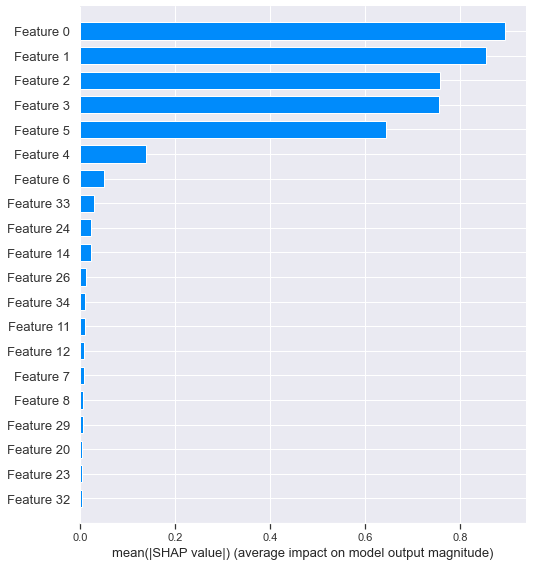

In [25]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

The feature are named according to their indexes. As the graph above shows, Feature 0,Feature 1, Feature 2,Feature 3,Feature 4 and Feature 5 have significant SHAP values torwards predicting the response variable. The variable are: `Weight_Kg`, `Low_Price`, `High_Price`, `Sales_Total`, `Total_Qty_Sold` and `Total_Kg_Sold`

Hence, we will remove all the other variables from the model.

In [26]:
#Defining the features (X) and the response variable (y)
train_select=train_new[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold','Total_Kg_Sold','avg_price_per_kg']] #df1 = df[['a', 'b']]
test_select=test_new[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold','Total_Kg_Sold']]

In [27]:
X = train_select.drop('avg_price_per_kg',axis=1).values
y = train_select['avg_price_per_kg'].values

In [28]:
#Train test split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
# create an xgboost regression model
model_XGB_select = xgb.XGBRegressor()

In [30]:
# Train the model on training data
model_XGB_select.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# Make predictions and evalute
train_pred = model_XGB_select.predict(x_train)
test_pred = model_XGB_select.predict(x_test)
#Calling the function for rmse
train_rmse = rmse(y_train, train_pred)
test_rmse = rmse(y_test, test_pred)

train_r2 = r_squared(y_train, train_pred)
test_r2 = r_squared(y_test, test_pred)

{'Train RMSE': train_rmse,'Test RMSE': test_rmse,'Train R^2':train_r2,'Test R^2':test_r2}

{'Train RMSE': 0.06859754959943477,
 'Test RMSE': 0.4004935442801757,
 'Train R^2': 0.9990871314820325,
 'Test R^2': 0.9654329165604739}

This model performs better than the other models in terms of RMSE scores. 

<a id="c"></a>
# 6. Conclusion

As we can see the XGBoost model has lower RMSE than the Random Forest model

To improve on our model performance in the future we would remove outliers because outliers: 
- Affects the overall standard variation of the data.
- Manipulates the overall mean of the data.
- Converts the data to a skewed form.
- It causes bias in the accuracy estimation of the machine learning model.
- Affects the distribution and statistics of the dataset.

# THE END